<a href="https://colab.research.google.com/github/Preet-Govind/LinearAndPolyRegression/blob/main/PolyRegPipe01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns

**Equations as follows:-**

**X is some value and y is a quadratic eqn**
```
y = 0.5 * X**2 + X + 2 + outlier
```

In [4]:
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

Text(0, 0.5, 'y')

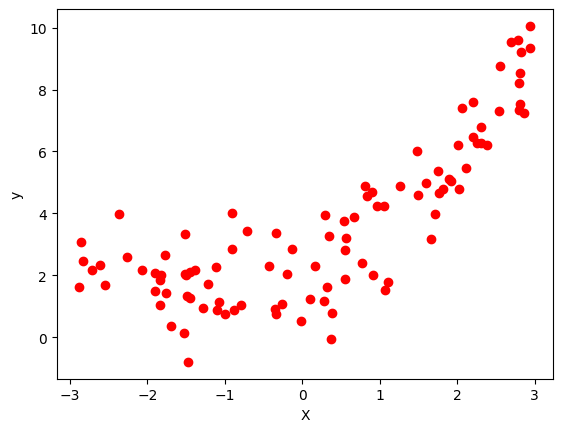

In [10]:
plt.scatter(x=X,y=y,color='r')
plt.xlabel('X')
plt.ylabel('y')

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Implement simple Linear Reg
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [17]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [22]:
from sklearn.metrics import r2_score
y_pred = lin_reg.predict(X_test)
r2Score = r2_score(y_test,y_pred)
r2Score

0.3964370274965736

Text(0, 0.5, 'y')

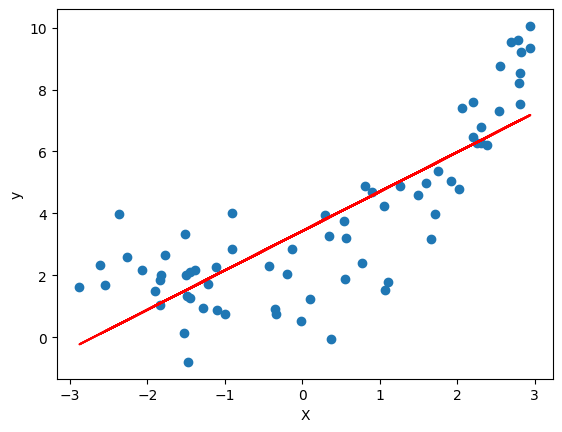

In [23]:
# visualize
plt.plot(X_train,lin_reg.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.xlabel('X')
plt.ylabel('y')

In [26]:
# Now let's apply polynomial regression as in case of Simple LReg, above, we can
# observe that there's a good potential of errors .
# applying polynomial transformation
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2,include_bias=True)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)

$h_{\theta}(x) = \beta_0 + \beta_1 x + \beta_2 x^2$

after ```include_bias=True```

$h_{\theta}(x) = \beta_0 x^1 + \beta_1 x + \beta_2 x^2$

In [39]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred = regression.predict(X_test_poly)
r2Score2 = r2_score(y_test,y_pred)
r2Score2

0.7374046235403435

In [36]:
print(regression.coef_)
print(regression.intercept_)

[[0.         1.00818374 0.48593955]]
[1.96803548]


In [35]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[1.27179057]]
[3.43049673]


Text(0, 0.5, 'y')

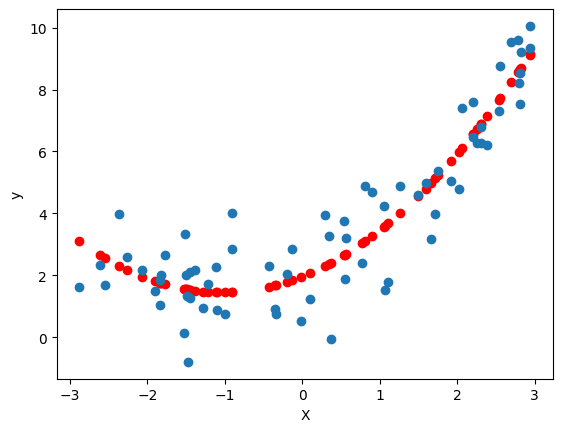

In [37]:
plt.scatter(X_train,regression.predict(X_train_poly),color='r')
plt.scatter(X_train,y_train)
plt.xlabel('X')
plt.ylabel('y')

In [40]:
# Now let's increase the degree of polynomial to 3
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3,include_bias=True)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)

In [41]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred = regression.predict(X_test_poly)
r2Score2 = r2_score(y_test,y_pred)
r2Score2

0.7374046235403435

In [42]:
print(regression.coef_)
print(regression.intercept_)

[[0.         0.73435284 0.45440011 0.05503972]]
[2.00528044]


in case of coef , 4 features can be seen

Text(0, 0.5, 'y')

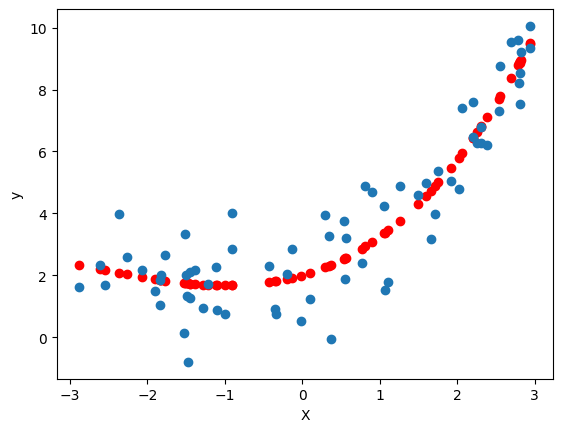

In [43]:
plt.scatter(X_train,regression.predict(X_train_poly),color='r')
plt.scatter(X_train,y_train)
plt.xlabel('X')
plt.ylabel('y')

Text(0, 0.5, 'y')

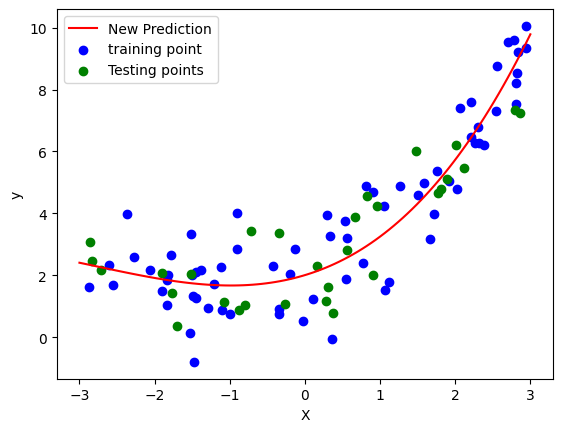

In [47]:
# Prediction for new data
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_reg.transform(X_new)
y_new = regression.predict(X_new_poly)

plt.plot(X_new,y_new,color='r',label='New Prediction')
plt.scatter(X_train,y_train,color='b',label='training point')
plt.scatter(X_test,y_test,color='g',label='Testing points')

plt.legend()
plt.xlabel('X')
plt.ylabel('y')

**Pipeline**

In [49]:
from sklearn.pipeline import Pipeline

In [58]:
from math import degrees
def poly_regression(degree):
  X_new = np.linspace(-3,3,100).reshape(100,1)
  #X_new_poly = poly_reg.transform(X_new)#
  poly_features = PolynomialFeatures(degree=degree,include_bias=True)
  lin_reg = LinearRegression()
  poly_regression = Pipeline([('poly_features',poly_features),('lin_reg',lin_reg)])
  poly_regression.fit(X_train,y_train)
  y_pred_new = poly_regression.predict(X_new)
  # Plotting
  plt.plot(X_new , y_pred_new , color='r',label='New Prediction'+str(degree))
  plt.scatter(X_train,y_train,color='b',label='training point')
  plt.scatter(X_test,y_test,color='g',label='Testing points')

  plt.legend()
  plt.xlabel('X')
  plt.ylabel('y')
  plt.show()

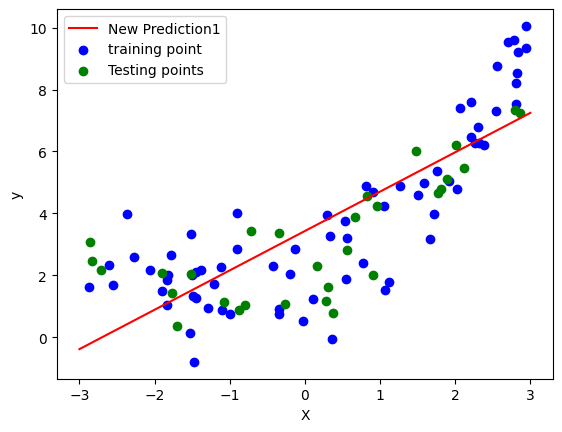

In [60]:
poly_regression(degree=1)

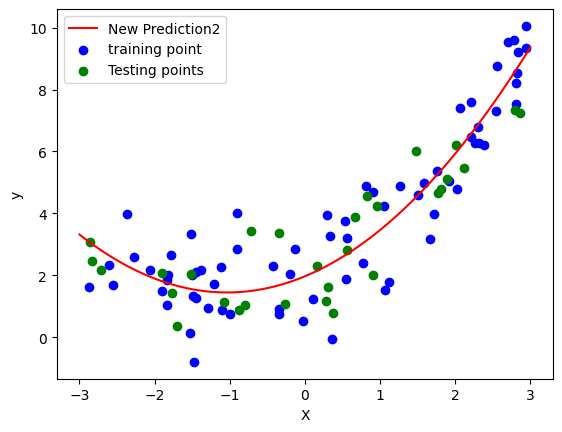

In [61]:
poly_regression(degree=2)

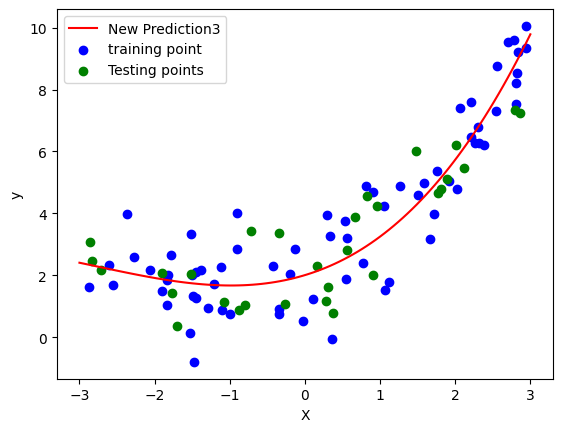

In [62]:
poly_regression(degree=3)

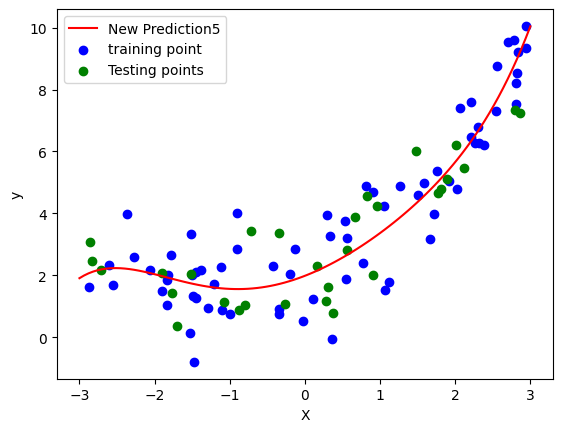

In [63]:
poly_regression(degree=5)

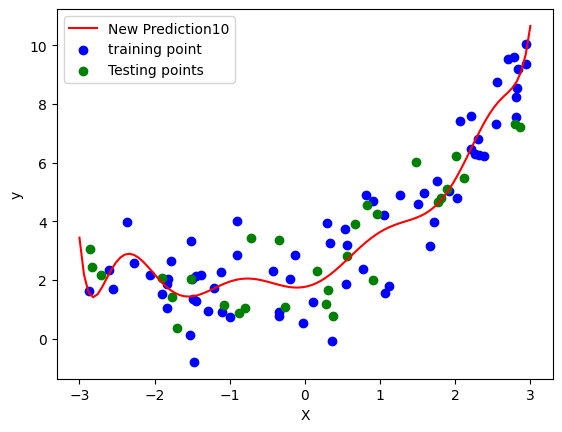

In [64]:
poly_regression(degree=10)

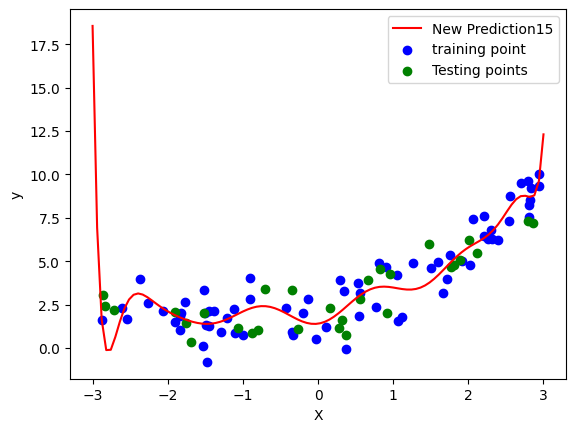

In [67]:
poly_regression(degree=15)